<p style="text-align:center;font-size:40px;font-weight:bold;color:#02bd9b">CRAFTY</p>
<p style="text-align:center;font-size:35px;font-weight:bold;color:#fea83a">Simone Passèra</p>

<p style="text-align:center;font-size:25px;font-weight:bold;color:#2b96de">Analisi generali dei dati della blockchain</p>

<h2 style="color:#00c4c4">DataSet</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

inputs = pd.read_csv('DataSet/inputs.csv', names=['txId', 'prevTxId', 'prevTxPos'])
outputs = pd.read_csv('DataSet/outputs.csv', names=['txId', 'position', 'addressId', 'amount', 'scripttype'])
mapping = pd.read_csv('DataSet/mapping.csv', names=['hash', 'addressId'])
transactions = pd.read_csv('DataSet/transactions.csv', names=['timestamp', 'blockId', 'txId', 'isCoinbase', 'fee'])

transactions['timestamp'] = pd.to_datetime(transactions['timestamp'], unit='s')

<h2 style="color:#fe5f5e">Analisi n.1</h2>

* Distribuzione del numero di transazioni per blocco (occupazione del blocco), nell’intero
periodo temporale considerato

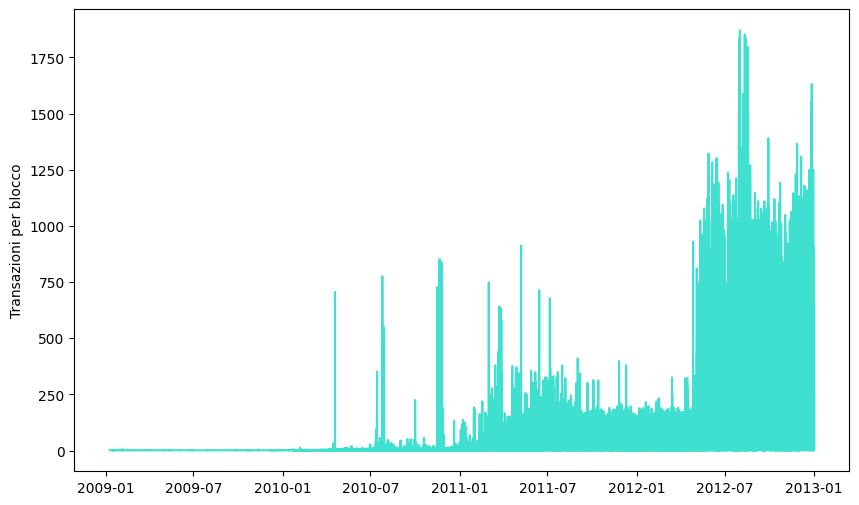

In [2]:
analisi_1 = transactions.groupby('timestamp')['timestamp'].count().reset_index(name='transactions')

plt.figure(figsize=(10,6))
plt.ylabel('Transazioni per blocco')
plt.plot(analisi_1['timestamp'], analisi_1['transactions'], color='turquoise')

<h2 style="color:#fe5f5e">Analisi n.2</h2>

* Evoluzione dell'occupazione dei blocchi nel tempo, considerando intervalli temporali di due
mesi. In questo caso produrre un grafico che riporti il numero di transazioni medie per ogni
periodo considerato

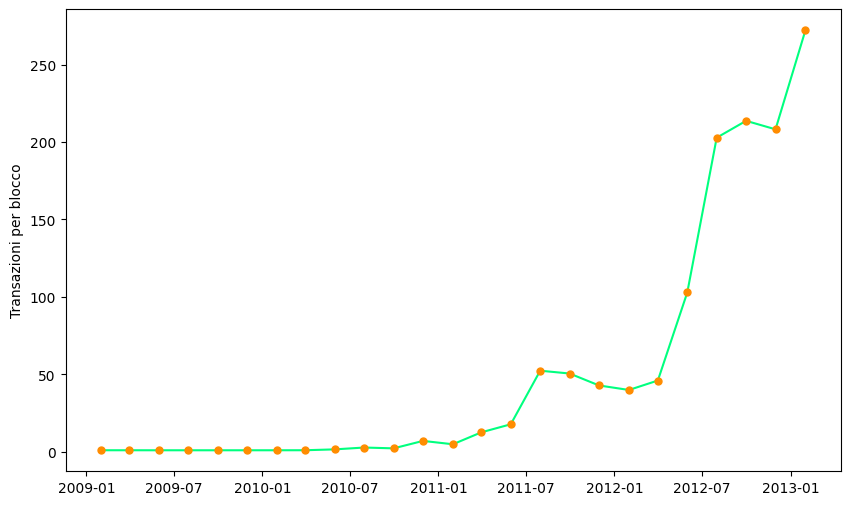

In [3]:
analisi_2 = analisi_1.groupby(pd.Grouper(key='timestamp', freq='2M')).mean().reset_index()

plt.figure(figsize=(10,6))
plt.ylabel('Transazioni per blocco')
plt.plot(analisi_2['timestamp'], analisi_2['transactions'], color='springgreen', marker='o', markersize=5, markeredgecolor='darkorange', markerfacecolor='darkorange')

<h2 style="color:#fe5f5e">Analisi n.3</h2>

* Ammontare totale degli **UTXO** al momento dell’ultima transazione registrata nella
blockchain considerata

In [4]:
UTXO = pd.merge(outputs, inputs, how='left', left_on=['txId', 'position'], right_on=['prevTxId', 'prevTxPos'], indicator=True)
UTXO = UTXO.loc[UTXO['_merge'] == 'left_only', 'amount']
print(f'Somma totale UTXO = {UTXO.sum()} BTC')

Somma totale UTXO = 859303372614879 BTC


<h2 style="color:#fe5f5e">Analisi n.4</h2>

* Distribuzione degli intervalli di tempo che intercorrono tra la transazione che genera un
valore in output (**UTXO**) e quella che lo consuma, per gli output spesi nel periodo
considerato.

<Figure size 1000x600 with 0 Axes>

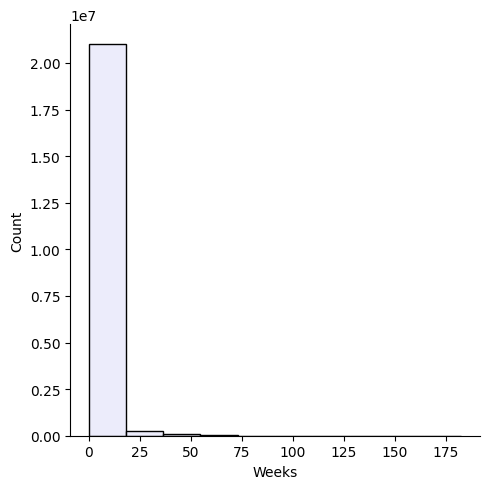

In [5]:
tx_match = pd.merge(outputs, inputs, how='left', left_on=['txId', 'position'], right_on=['prevTxId', 'prevTxPos'], indicator=True)
tx_match = tx_match.loc[tx_match['_merge'] == 'both', ['txId_x', 'txId_y']]
tx_match.rename(columns={'txId_x': 'txId_out', 'txId_y': 'txId_in'}, inplace=True)

tx_out_time = pd.merge(tx_match, transactions, left_on='txId_out', right_on='txId')
tx_out_time.rename(columns={'timestamp': 'time_out'}, inplace=True)
tx_out_time = tx_out_time.loc[:, ['time_out', 'txId_in']]

tx_in_time = pd.merge(tx_out_time, transactions, left_on='txId_in', right_on='txId')
tx_in_time.rename(columns={'timestamp': 'time_in'}, inplace=True)

tx_time = tx_in_time.loc[:, ['time_out', 'time_in']]
tx_time['Weeks'] = (tx_time['time_in'] - tx_time['time_out']) / np.timedelta64(1, 'W')

plt.figure(figsize=(10,6))
sns.displot(tx_time['Weeks'], bins=10, color='lavender')

<h2 style="color:#fe5f5e">Analisi n.5</h2>

* TODO

<p style="text-align:center;font-size:25px;font-weight:bold;color:#2b96de">Clusterizzazione degli indirizzi di Bitcoin: euristica multi-input</p>

<p style="text-align:center;font-size:25px;font-weight:bold;color:#2b96de">Deanonimizzazione degli indirizzi</p>